# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### **1.1 Load the Data**

In [3]:
# Load the dataset
employee_data = pd.read_csv('Employee_data.csv')


In [4]:
# Check the first few entries
employee_data.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [5]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
employee_data.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
employee_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column
percent= employee_data.isnull().sum()*100/len(employee_data)
percent

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column
print("/n distance from home median:", employee_data['Distance from Home'].median())
print("/n company tenure median:", employee_data['Company Tenure (In Months)'].median())
employee_data['Distance from Home'].fillna(employee_data['Distance from Home'].median(), inplace=True)
employee_data['Company Tenure (In Months)'].fillna(employee_data['Company Tenure (In Months)'].median(), inplace=True)
employee_data.isnull().sum()



/n distance from home median: 50.0
/n company tenure median: 56.0


Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed
percentage= employee_data.isnull().sum()*100/len(employee_data)
percentage

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values
## listing categorical column ##
cat_cols= employee_data.select_dtypes(include=['object']).columns.tolist()
cat_cols

## checking unique variables before cleaning ##
for col in cat_cols:
  print(col)
  print(employee_data[col].unique())

for col in cat_cols:
  employee_data[col]= employee_data[col].str.lower()
  employee_data[col]= employee_data[col].str.strip()


Gender
['Male' 'Female']
Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
Performance Rating
['Average' 'Low' 'High' 'Below Average']
Overtime
['No' 'Yes']
Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
Marital Status
['Married' 'Divorced' 'Single']
Job Level
['Mid' 'Senior' 'Entry']
Company Size
['Medium' 'Small' 'Large']
Remote Work
['No' 'Yes']
Leadership Opportunities
['No' 'Yes']
Innovation Opportunities
['No' 'Yes']
Company Reputation
['Excellent' 'Fair' 'Poor' 'Good']
Employee Recognition
['Medium' 'Low' 'High' 'Very High']
Attrition
['Stayed' 'Left']


In [14]:
# Check the data
for col in cat_cols:
  print(col)
  print(employee_data[col].unique())

Gender
['male' 'female']
Job Role
['education' 'media' 'healthcare' 'technology' 'finance']
Work-Life Balance
['excellent' 'poor' 'good' 'fair']
Job Satisfaction
['medium' 'high' 'very high' 'low']
Performance Rating
['average' 'low' 'high' 'below average']
Overtime
['no' 'yes']
Education Level
['associate degree' 'masterâ€™s degree' 'bachelorâ€™s degree'
 'high school' 'phd']
Marital Status
['married' 'divorced' 'single']
Job Level
['mid' 'senior' 'entry']
Company Size
['medium' 'small' 'large']
Remote Work
['no' 'yes']
Leadership Opportunities
['no' 'yes']
Innovation Opportunities
['no' 'yes']
Company Reputation
['excellent' 'fair' 'poor' 'good']
Employee Recognition
['medium' 'low' 'high' 'very high']
Attrition
['stayed' 'left']


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [15]:
# Drop redundant columns which are not required for model
employee_data1= employee_data.drop(['Employee ID'], axis=1)



In [16]:
# Check first few rows of data
employee_data1.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    male                19   education            5390   
1   59  female                 4       media            5534   
2   24  female                10  healthcare            8159   
3   36  female                 7   education            3989   
4   56    male                41   education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         excellent           medium            average                     2   
1              poor             high                low                     3   
2              good             high                low                     0   
3              good             high               high                     1   
4              fair        very high            average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       no  ...                     0       mid       medium   
1       no  ...                     3       mid       medium   
2       no  ...                     3       mid       medium   
3       no  ...                     2       mid        small   
4      yes  ...                     0    senior       medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          no                       no   
1                        21.0          no                       no   
2                        74.0          no                       no   
3                        50.0         yes                       no   
4                        68.0          no                       no   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        no          excellent               medium    stayed  
1                        no               fair                  low    stayed  
2                        no               poor                  low    stayed  
3                        no               good               medium    stayed  
4                        no               fair               medium    stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [17]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [18]:
# Put all the feature variables in X
x= employee_data1.drop(['Attrition'], axis=1)

# Put the target variable in y
y= employee_data1['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [19]:
# Split the data into 70% train data and 30% validation data
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(52227, 22)
(22383, 22)
(52227,)
(22383,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [20]:
# Select numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

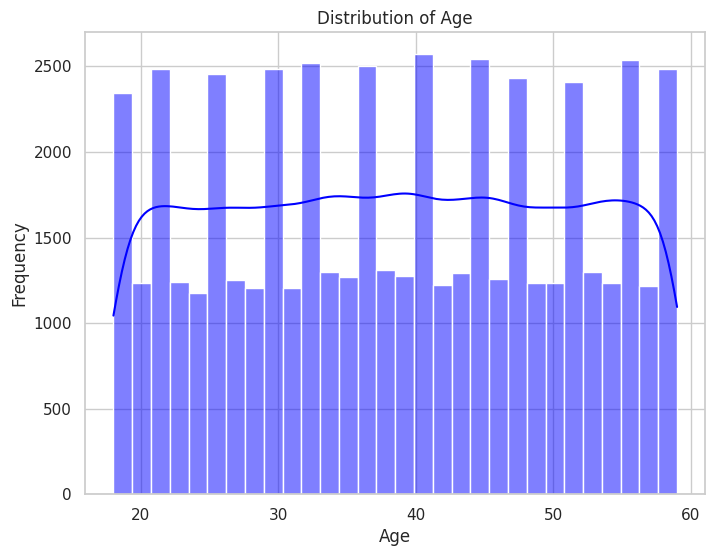

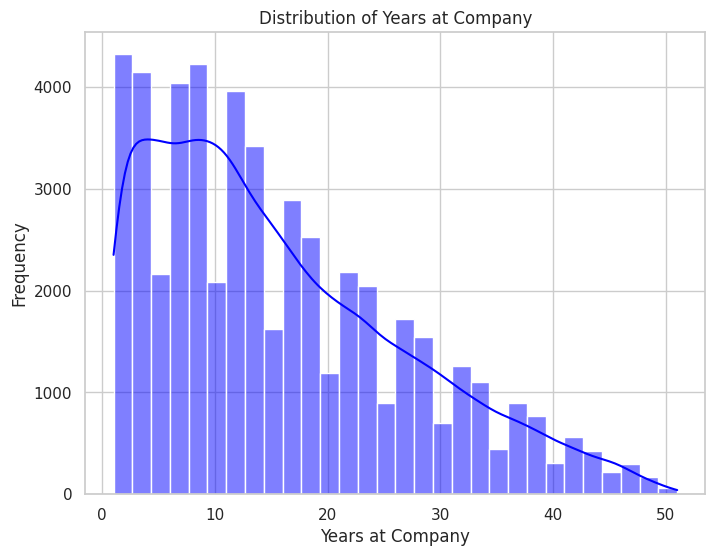

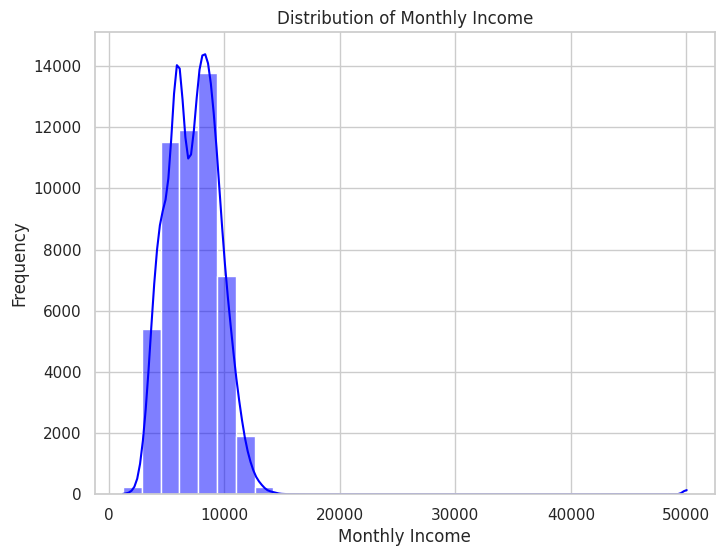

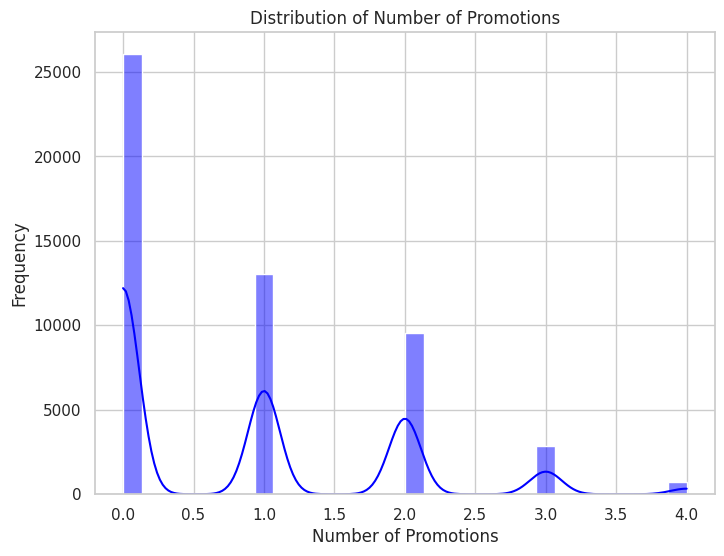

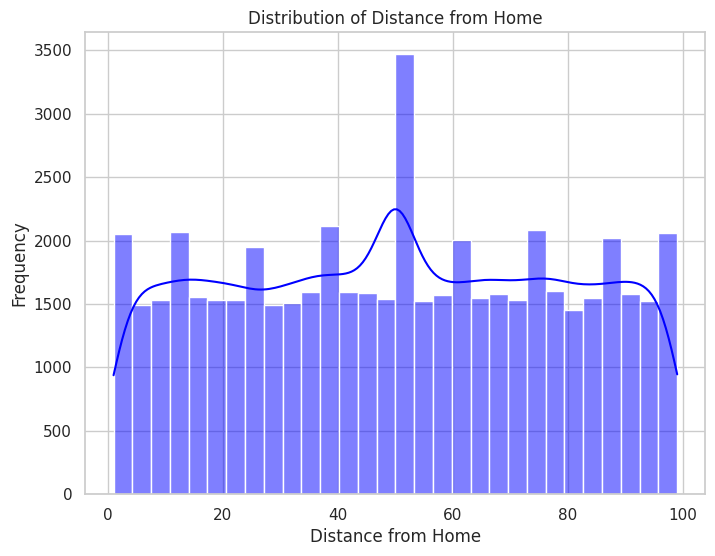

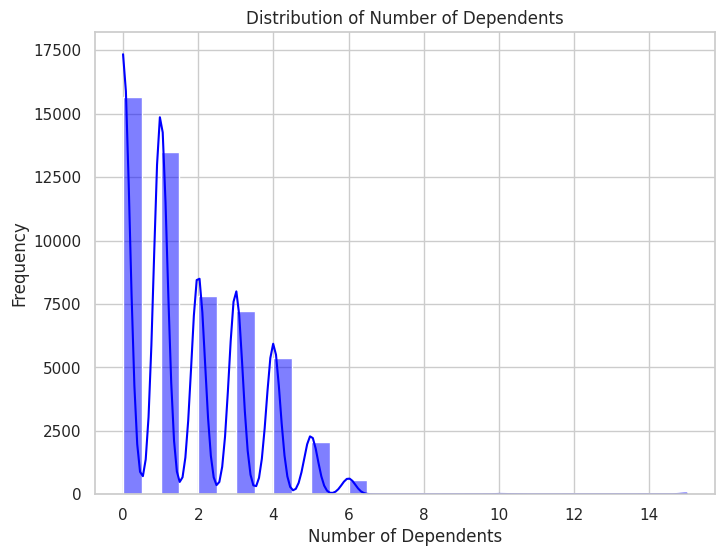

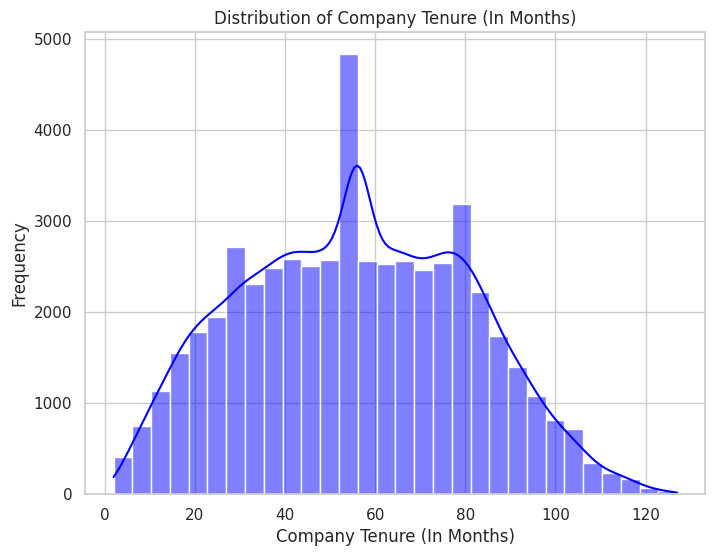

In [21]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
for col in num_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(X_train[col], kde=True, bins=30, color='blue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

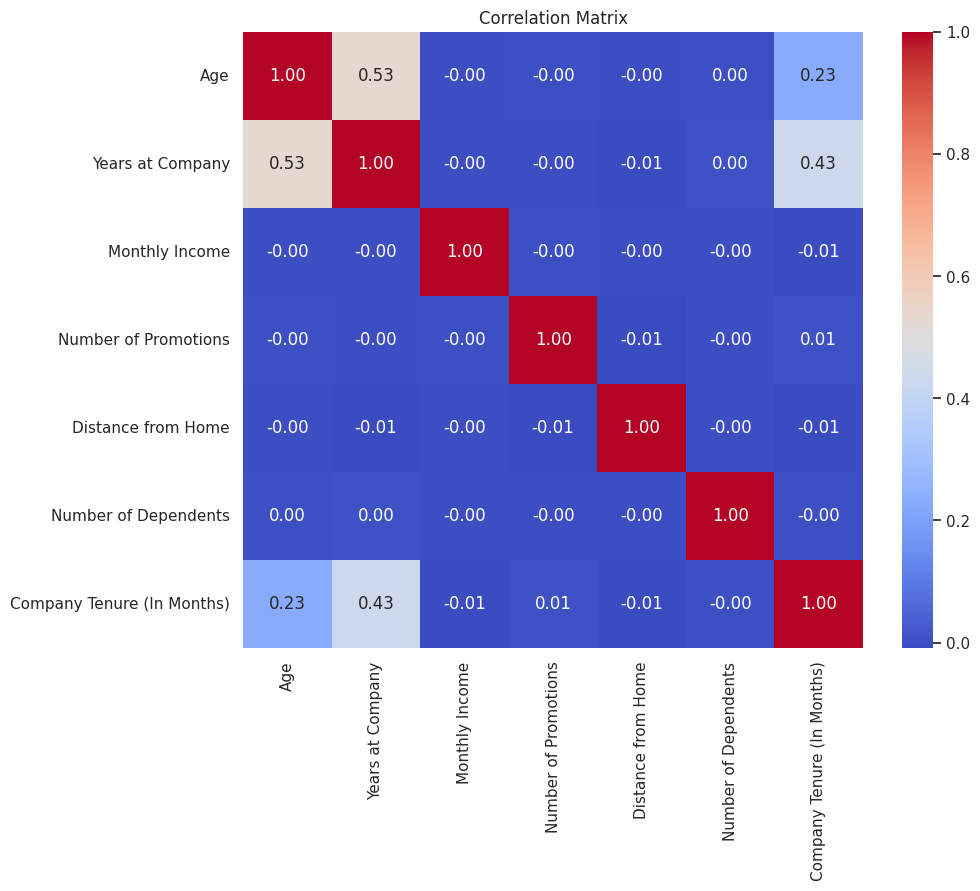

In [22]:
# Create correlation matrix for numerical columns
correlation_matrix = X_train[num_cols].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

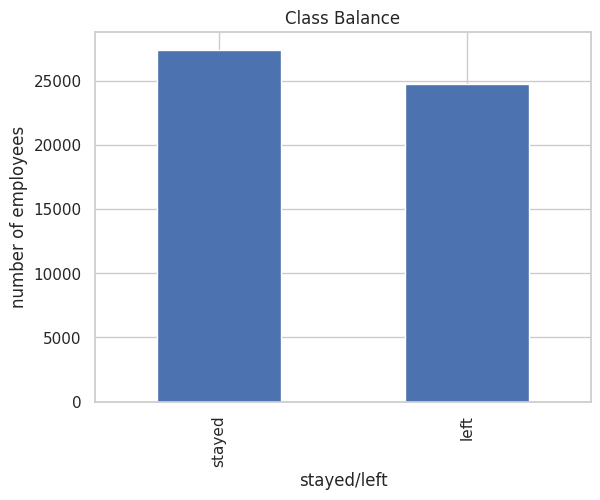

In [23]:
# Plot a bar chart to check class balance
y_train.value_counts().plot(kind='bar')
plt.title('Class Balance')
plt.xlabel('stayed/left')
plt.ylabel('number of employees')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

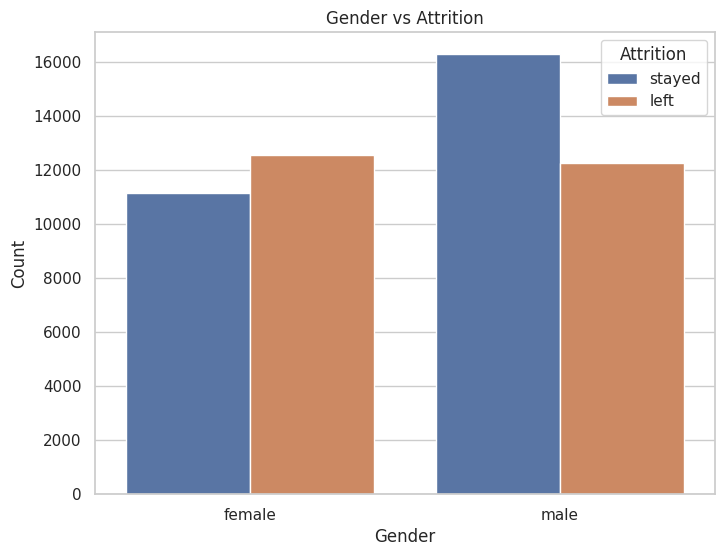

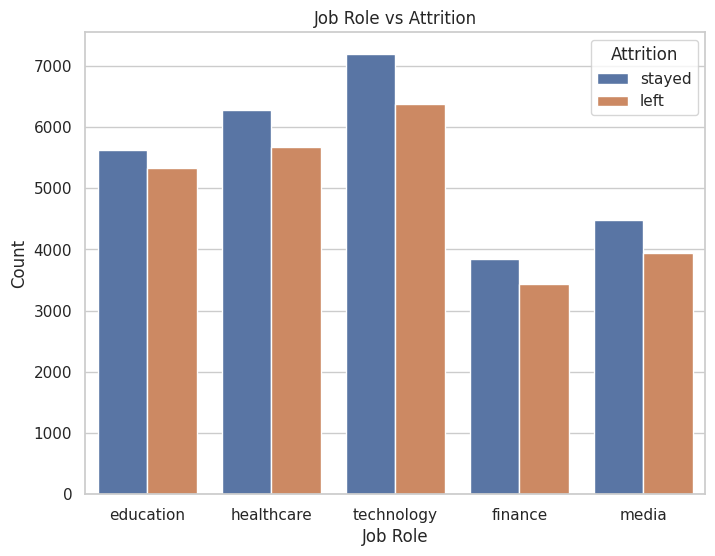

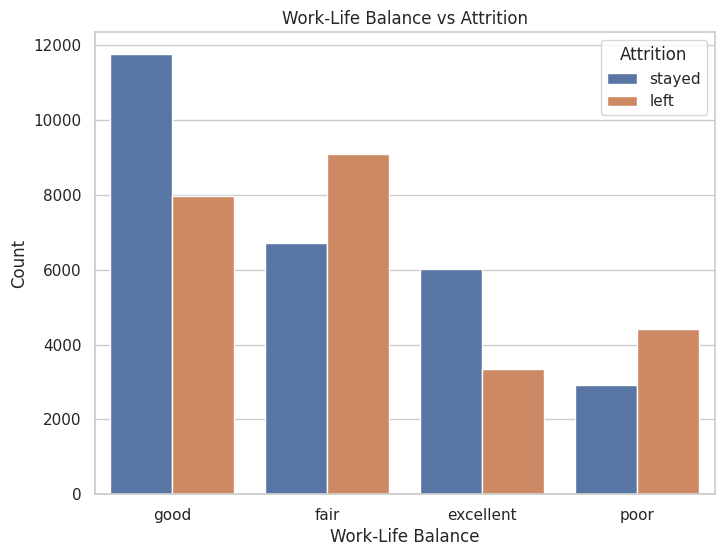

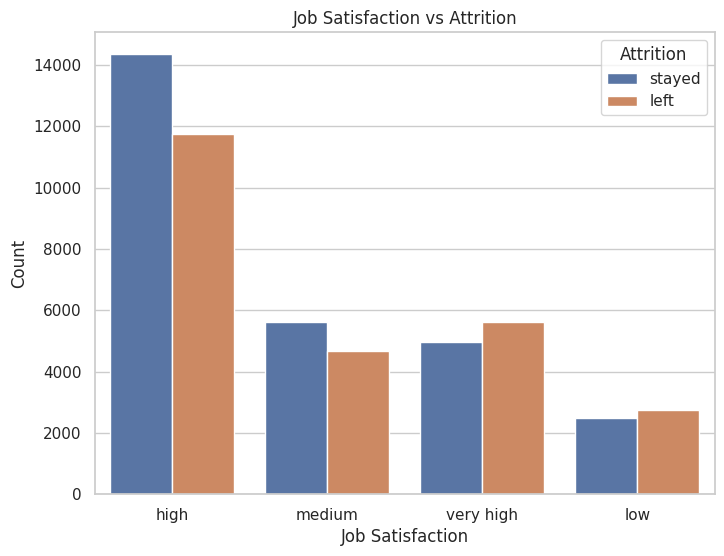

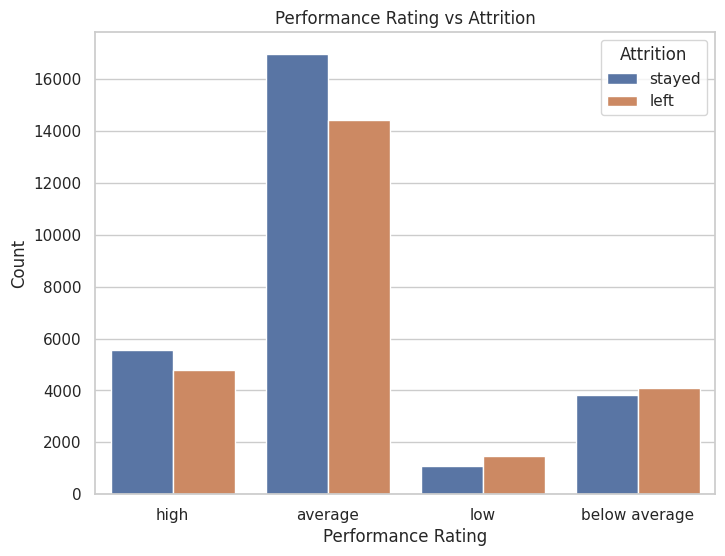

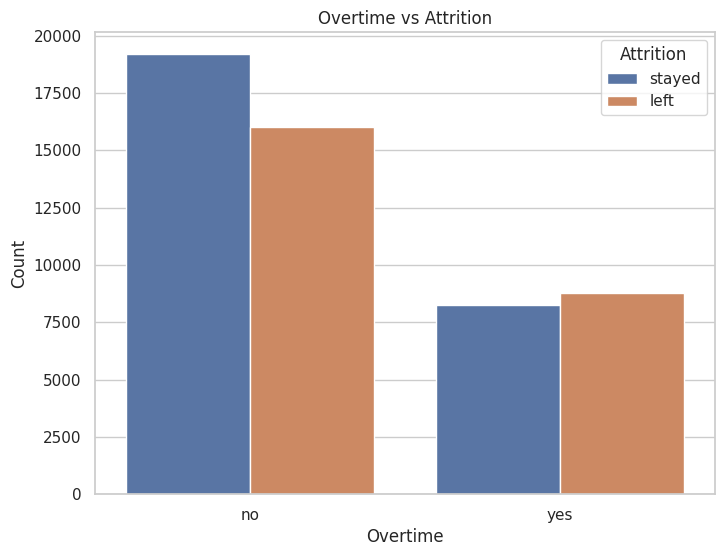

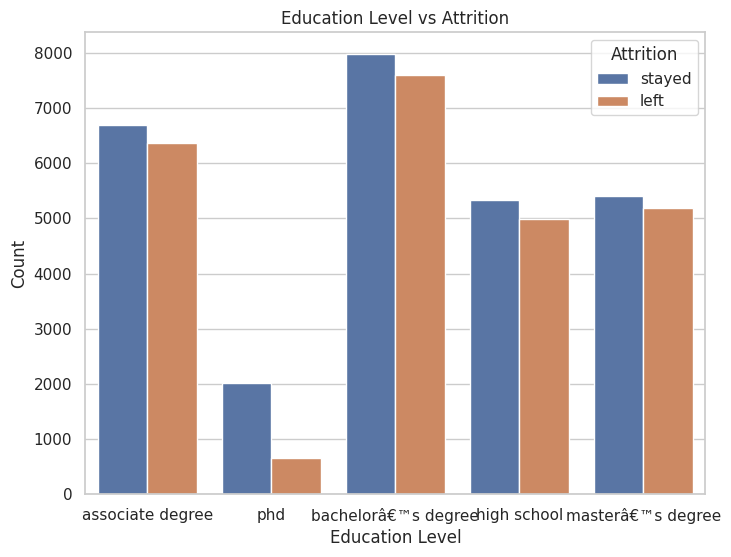

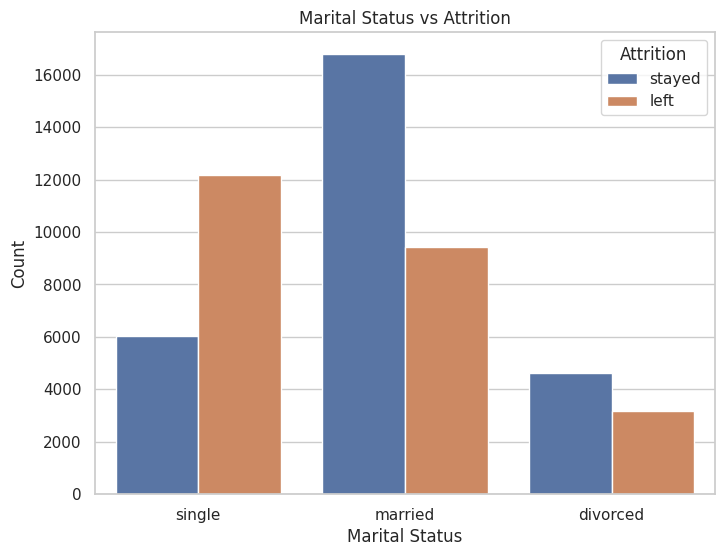

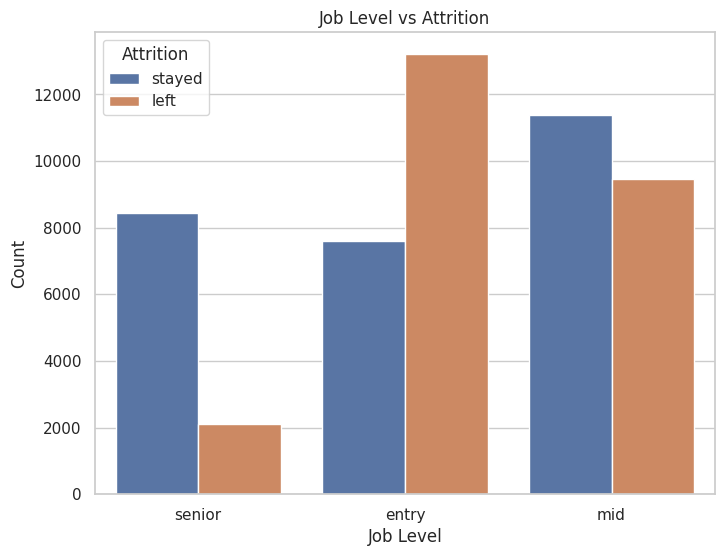

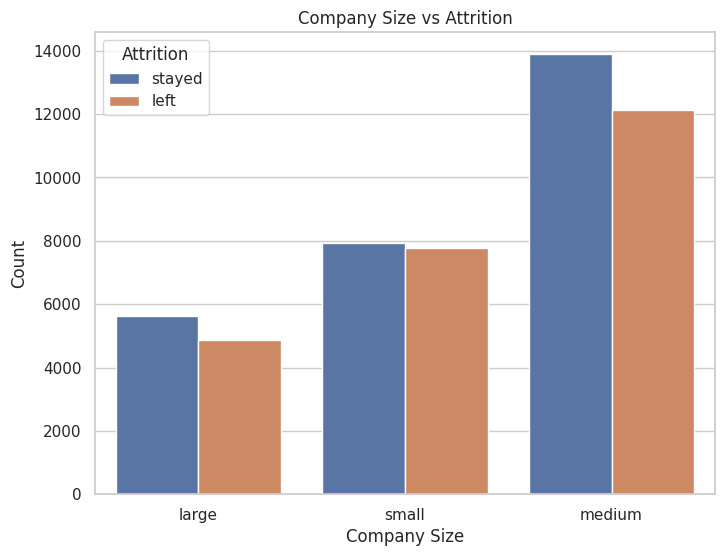

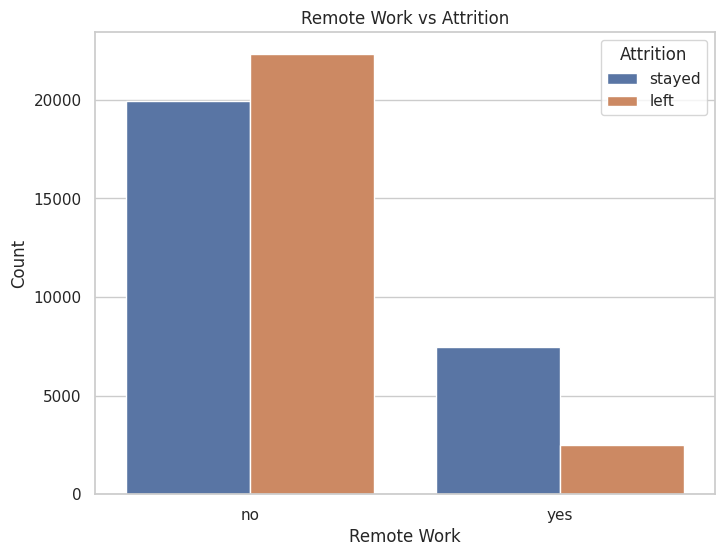

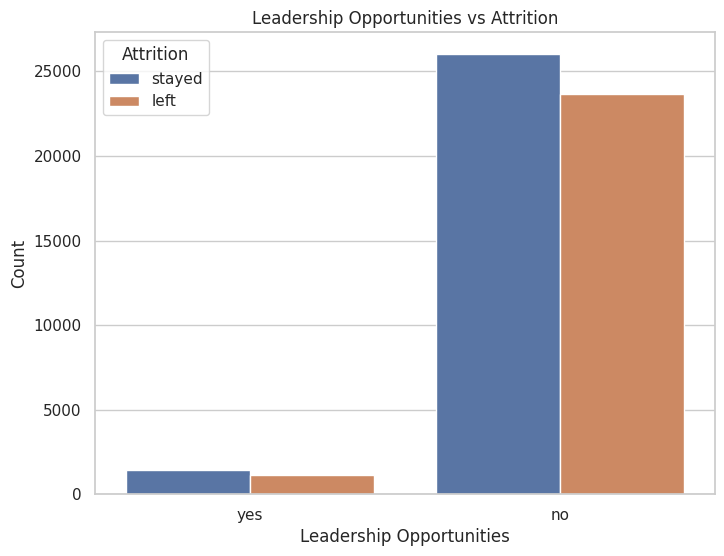

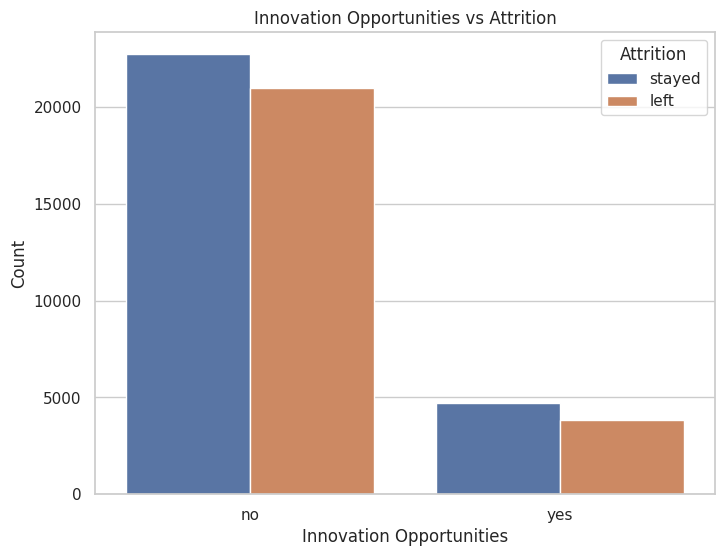

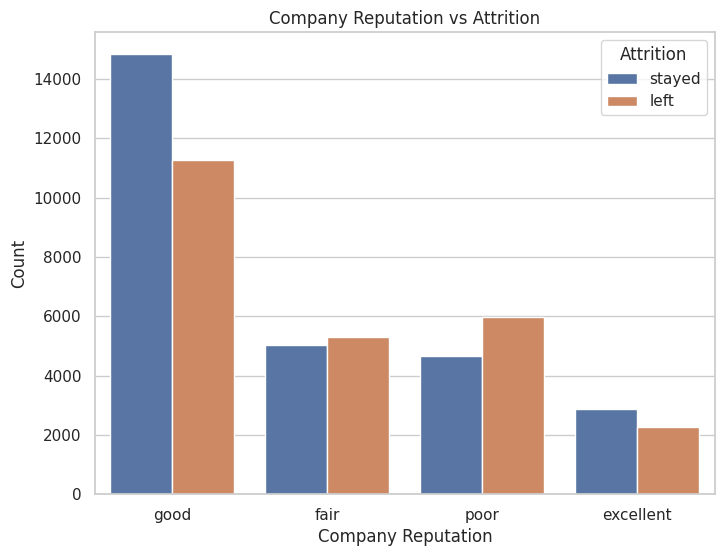

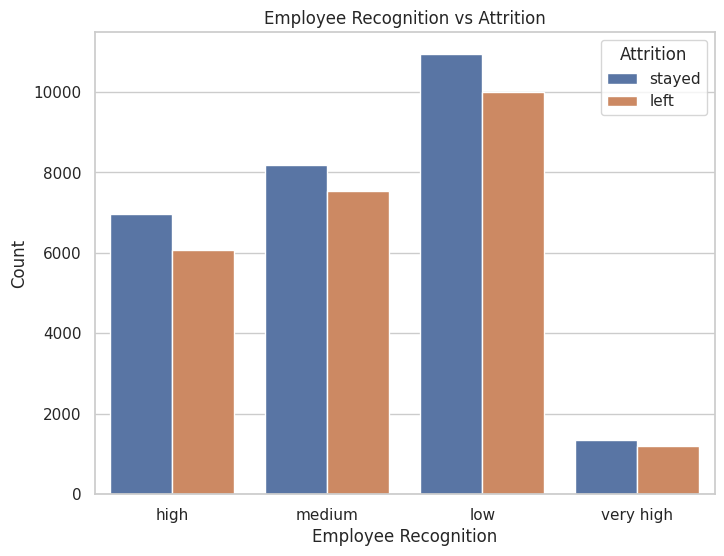

In [24]:
# Plot distribution for each categorical column with target variable
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, hue=y_train, data=X_train)
  plt.title(f'{col} vs Attrition')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [ ]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [ ]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [ ]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [ ]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [25]:
# Check the categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [26]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Add the results to the master DataFrame
X_train_master= X_train_dummies

Now, drop the original categorical columns and check the DataFrame

In [27]:
# Drop the original categorical columns and check the DataFrame
x_train_num= X_train.drop(cat_cols, axis=1)
x_train_num.head()

#adding numerical columns and dummy variables into a master dataframe
X_train_master= pd.concat([x_train_num, X_train_dummies], axis=1)
X_train_master.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
20940   25                 1            4207                     2   
17495   26                13            9601                     0   
28404   35                19            5415                     0   
70914   21                 9            8258                     0   
56430   53                24            6015                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
20940                 6.0                     5                        78.0   
17495                14.0                     0                        83.0   
28404                10.0                     3                        48.0   
70914                50.0                     5                        16.0   
56430                13.0                     0                        79.0   

       Age  Years at Company  Monthly Income  ...  Company Size_small  \
20940   25                 1            4207  ...               False   
17495   26                13            9601  ...                True   
28404   35                19            5415  ...               False   
70914   21                 9            8258  ...                True   
56430   53                24            6015  ...                True   

       Remote Work_yes  Leadership Opportunities_yes  \
20940            False                          True   
17495            False                          True   
28404            False                         False   
70914            False                         False   
56430            False                          True   

       Innovation Opportunities_yes  Company Reputation_fair  \
20940                         False                    False   
17495                         False                    False   
28404                         False                    False   
70914                         False                    False   
56430                         False                    False   

       Company Reputation_good  Company Reputation_poor  \
20940                     True                    False   
17495                     True                    False   
28404                     True                    False   
70914                     True                    False   
56430                     True                    False   

       Employee Recognition_low  Employee Recognition_medium  \
20940                     False                        False   
17495                     False                         True   
28404                     False                         True   
70914                     False                        False   
56430                     False                        False   

       Employee Recognition_very high  
20940                           False  
17495                           False  
28404                           False  
70914                           False  
56430                           False  

[5 rows x 48 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [28]:
# Create dummy variables using the 'get_dummies' for independent columns
X_validation_dummies = pd.get_dummies(X_validation, columns=cat_cols, drop_first=True)
X_validation_dummies.shape
# Add the results to the master DataFrame
X_validation_master= X_validation_dummies

Now, drop the original categorical columns and check the DataFrame

In [29]:
# Drop categorical columns and check the DataFrame
X_validation_num= X_validation.drop(cat_cols, axis=1)
X_validation_master= pd.concat([X_validation_num, X_validation_dummies], axis=1)
X_validation_master.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
61298   45                 9           10454                     0   
46813   44                10            3670                     0   
37033   24                 5            6663                     0   
41834   41                10            6042                     0   
25905   44                16            7801                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
61298                25.0                     2                        87.0   
46813                64.0                     0                        89.0   
37033                18.0                     1                        65.0   
41834                84.0                     0                        52.0   
25905                 7.0                     5                        36.0   

       Age  Years at Company  Monthly Income  ...  Company Size_small  \
61298   45                 9           10454  ...                True   
46813   44                10            3670  ...               False   
37033   24                 5            6663  ...               False   
41834   41                10            6042  ...                True   
25905   44                16            7801  ...                True   

       Remote Work_yes  Leadership Opportunities_yes  \
61298            False                         False   
46813            False                         False   
37033            False                         False   
41834            False                         False   
25905            False                          True   

       Innovation Opportunities_yes  Company Reputation_fair  \
61298                         False                    False   
46813                         False                    False   
37033                          True                    False   
41834                         False                    False   
25905                         False                    False   

       Company Reputation_good  Company Reputation_poor  \
61298                     True                    False   
46813                    False                    False   
37033                    False                     True   
41834                     True                    False   
25905                    False                     True   

       Employee Recognition_low  Employee Recognition_medium  \
61298                     False                        False   
46813                     False                         True   
37033                     False                         True   
41834                     False                         True   
25905                      True                        False   

       Employee Recognition_very high  
61298                           False  
46813                           False  
37033                           False  
41834                           False  
25905                           False  

[5 rows x 48 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [30]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train)
y_validation_df = pd.DataFrame(y_validation)
y_train_df.head()
y_validation_df.head()

Attrition
61298      left
46813    stayed
37033      left
41834    stayed
25905    stayed

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [31]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train_df, columns=['Attrition'], drop_first=True)
y_train_dummies.head()

Attrition_stayed
20940              True
17495             False
28404             False
70914              True
56430              True

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [32]:
# Create dummy variables using the 'get_dummies' for dependent column
y_validation_dummies = pd.get_dummies(y_validation_df, columns=['Attrition'], drop_first=True)
y_validation_dummies.head()

Attrition_stayed
61298             False
46813              True
37033             False
41834              True
25905              True

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [33]:
# Drop redundant columns from both train and validation
#already done during dummy creation
X_validation_dummies=X_validation_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)
X_train_dummies.shape
X_validation_dummies.shape

(22383, 41)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [34]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [35]:
# Scale the numeric features present in the training set

scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train_master)
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train_master.columns)
X_train_scaled.head()

# Scale the numerical features present in the validation set
X_validation_scaled= scaler.transform(X_validation_master)
X_validation_scaled= pd.DataFrame(X_validation_scaled, columns=X_validation_master.columns)
X_validation_scaled.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
0  0.658537              0.16        0.189083                  0.00   
1  0.634146              0.18        0.050078                  0.00   
2  0.146341              0.08        0.111405                  0.00   
3  0.560976              0.18        0.098680                  0.00   
4  0.634146              0.30        0.134723                  0.25   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0            0.244898              0.133333                       0.680   
1            0.642857              0.000000                       0.696   
2            0.173469              0.066667                       0.504   
3            0.846939              0.000000                       0.400   
4            0.061224              0.333333                       0.272   

        Age  Years at Company  Monthly Income  ...  Company Size_small  \
0  0.658537              0.16        0.189083  ...                 1.0   
1  0.634146              0.18        0.050078  ...                 0.0   
2  0.146341              0.08        0.111405  ...                 0.0   
3  0.560976              0.18        0.098680  ...                 1.0   
4  0.634146              0.30        0.134723  ...                 1.0   

   Remote Work_yes  Leadership Opportunities_yes  \
0              0.0                           0.0   
1              0.0                           0.0   
2              0.0                           0.0   
3              0.0                           0.0   
4              0.0                           1.0   

   Innovation Opportunities_yes  Company Reputation_fair  \
0                           0.0                      0.0   
1                           0.0                      0.0   
2                           1.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   

   Company Reputation_good  Company Reputation_poor  Employee Recognition_low  \
0                      1.0                      0.0                       0.0   
1                      0.0                      0.0                       0.0   
2                      0.0                      1.0                       0.0   
3                      1.0                      0.0                       0.0   
4                      0.0                      1.0                       1.0   

   Employee Recognition_medium  Employee Recognition_very high  
0                          0.0                             0.0  
1                          1.0                             0.0  
2                          1.0                             0.0  
3                          1.0                             0.0  
4                          0.0                             0.0  

[5 rows x 48 columns]

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

In [36]:
X_train_scaled.fillna(X_train_scaled.mean(), inplace= True)

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [37]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [38]:
# Import RFE and select 15 variables
lg= LogisticRegression()
rfe= RFE(lg, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train_dummies)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [39]:
# Display the features selected by RFE
selected_features = rfe.support_
selected_columns= X_train_scaled.columns
selected_columns[selected_features]

Index(['Number of Promotions', 'Number of Dependents', 'Years at Company',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Gender_male', 'Work-Life Balance_fair', 'Work-Life Balance_poor',
       'Education Level_phd', 'Marital Status_single', 'Job Level_mid',
       'Job Level_senior', 'Remote Work_yes', 'Company Reputation_poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [40]:
# Put columns selected by RFE into variable 'col'
col= selected_columns.tolist()
col

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)',
 'Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)',
 'Gender_male',
 'Job Role_finance',
 'Job Role_healthcare',
 'Job Role_media',
 'Job Role_technology',
 'Work-Life Balance_fair',
 'Work-Life Balance_good',
 'Work-Life Balance_poor',
 'Job Satisfaction_low',
 'Job Satisfaction_medium',
 'Job Satisfaction_very high',
 'Performance Rating_below average',
 'Performance Rating_high',
 'Performance Rating_low',
 'Overtime_yes',
 'Education Level_bachelorâ€™s degree',
 'Education Level_high school',
 'Education Level_masterâ€™s degree',
 'Education Level_phd',
 'Marital Status_married',
 'Marital Status_single',
 'Job Level_mid',
 'Job Level_senior',
 'Company Size_medium',
 'Company Size_small',
 'Remote Work_yes',
 'Leadership Opportunitie

**7.2 Building Logistic Regression Model [20 marks]**


Now that you have selected the variable through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [41]:
# Select only the columns selected by RFE
rfe_selected_columns= X_train_scaled.columns[rfe.support_]
X_train_rfe= X_train_scaled[rfe_selected_columns]

In [42]:
# View the training data
X_train_scaled.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
0  0.170732              0.00        0.061081                  0.50   
1  0.195122              0.24        0.171605                  0.00   
2  0.414634              0.36        0.085833                  0.00   
3  0.073171              0.16        0.144087                  0.00   
4  0.853659              0.46        0.098127                  0.25   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0            0.051020              0.333333                       0.608   
1            0.132653              0.000000                       0.648   
2            0.091837              0.200000                       0.368   
3            0.500000              0.333333                       0.112   
4            0.122449              0.000000                       0.616   

        Age  Years at Company  Monthly Income  ...  Company Size_small  \
0  0.170732              0.00        0.061081  ...                 0.0   
1  0.195122              0.24        0.171605  ...                 1.0   
2  0.414634              0.36        0.085833  ...                 0.0   
3  0.073171              0.16        0.144087  ...                 1.0   
4  0.853659              0.46        0.098127  ...                 1.0   

   Remote Work_yes  Leadership Opportunities_yes  \
0              0.0                           1.0   
1              0.0                           1.0   
2              0.0                           0.0   
3              0.0                           0.0   
4              0.0                           1.0   

   Innovation Opportunities_yes  Company Reputation_fair  \
0                           0.0                      0.0   
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   

   Company Reputation_good  Company Reputation_poor  Employee Recognition_low  \
0                      1.0                      0.0                       0.0   
1                      1.0                      0.0                       0.0   
2                      1.0                      0.0                       0.0   
3                      1.0                      0.0                       0.0   
4                      1.0                      0.0                       0.0   

   Employee Recognition_medium  Employee Recognition_very high  
0                          0.0                             0.0  
1                          1.0                             0.0  
2                          1.0                             0.0  
3                          0.0                             0.0  
4                          0.0                             0.0  

[5 rows x 48 columns]

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [43]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [44]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data= pd.DataFrame()


vif_data["features"]= X_train_rfe.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data

high_vif_features= vif_data[vif_data["VIF"]>10]["features"].tolist()
X_train_rfe= X_train_rfe.drop(high_vif_features, axis=1)
X_train_rfe_sm= sm.add_constant(X_train_rfe)


lg_model_rfe= sm.Logit(y_train_dummies.reset_index(drop=True), X_train_rfe_sm.reset_index(drop=True)).fit()
lg_model_rfe.summary()



Optimization terminated successfully.
         Current function value: 0.516374
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Attrition_stayed   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52217
Method:                           MLE   Df Model:                            9
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2537
Time:                        14:57:25   Log-Likelihood:                -26969.
converged:                       True   LL-Null:                       -36134.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2101      0.024     -8.808      0.000      -0.257      -0.163
Gender_male                 0.5594      0.021     26.231      0.000       0.518       0.601
Work-Life Balance_fair     -1.0542      0.024    -43.522      0.000      -1.102      -1.007
Work-Life Balance_poor     -1.2081      0.032    -37.685      0.000      -1.271      -1.145
Education Level_phd         1.5240      0.054     28.385      0.000       1.419       1.629
Marital Status_single      -1.6541      0.024    -70.077      0.000      -1.700      -1.608
Job Level_mid               0.9412      0.023     40.536      0.000       0.896       0.987
Job Level_senior            2.4798      0.033     74.640      0.000       2.415       2.545
Remote Work_yes             1.6515      0.030     55.313      0.000       1.593       1.710
Company Reputation_poor    -0.6125      0.026    -23.153      0.000      -0.664      -0.561
===========================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [45]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Make a VIF DataFrame for all the variables present
vif_data= pd.DataFrame()
vif_data["features"]= X_train_rfe.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data

# dropping a feature if p-value is too high
high_vif_features= vif_data[vif_data["VIF"]>10]["features"].tolist()
X_train_rfe= X_train_rfe.drop(high_vif_features, axis=1)


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [47]:
# Predict the probabilities on the training set
X_train_pred_prob= lg_model_rfe.predict(X_train_rfe_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [48]:
# Reshape it into an array
X_train_pred_prob= np.array(X_train_pred_prob).reshape(-1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [49]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
pred_df= pd.DataFrame({'Actual': y_train.values, 'Predicted': X_train_pred_prob})


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [50]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
pred_df['Predicted'] = pred_df['Predicted'].apply(lambda x: 1 if x > 0.5 else 0)
pred_df.head()

Actual  Predicted
0  stayed          1
1    left          1
2    left          0
3  stayed          1
4  stayed          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [51]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_train_num= y_train.map({'stayed':1, 'left':0})

y_train_pred= pred_df['Predicted']
# Check the overall accuracy
accuracy= accuracy_score(y_train_num, y_train_pred)
accuracy

0.7336435177207191

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [52]:
# Create confusion matrix
conf_matrix= confusion_matrix(y_train_num, y_train_pred)
conf_matrix

array([[17588,  7205],
       [ 6706, 20728]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [53]:
# Create variables for true positive, true negative, false positive and false negative
tp, tn, fp, fn = conf_matrix.ravel()
tp, tn, fp, fn

(np.int64(17588), np.int64(7205), np.int64(6706), np.int64(20728))

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [54]:
# Calculate sensitivity
sensitivity= tp/(tp+fn)
sensitivity

np.float64(0.45902495041236036)

In [55]:
# Calculate specificity
specificity= tn/(tn+fp)
specificity

np.float64(0.5179354467687441)

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [56]:
# Calculate precision
precision= precision_score(y_train_num, y_train_pred)
precision

0.7420613611140945

In [57]:
# Calculate recall
recall= recall_score(y_train_num, y_train_pred)
recall

0.7555587956550266

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [58]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

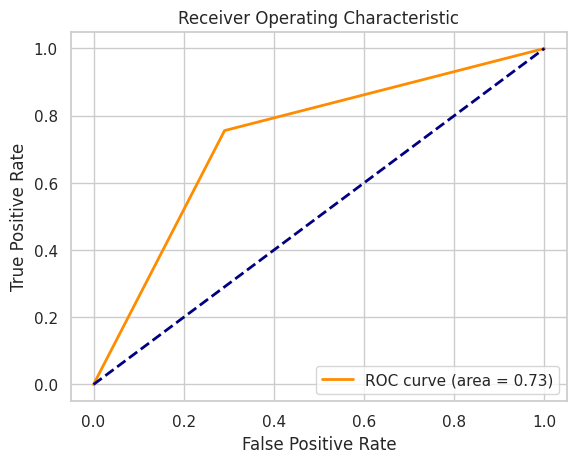

In [59]:
# Call the ROC function
plot_roc_curve(y_train_num, pred_df['Predicted'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [60]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoff_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy_list= []
sensitivity_list= []
specificity_list= []

for cutoff in cutoff_values:
    pred_df[f'prob_{cutoff}'] = pred_df['Predicted'].apply(lambda x: 1 if x > cutoff else 0)
    accuracy_list.append((tp+tn)/(tp+tn+fp+fn))
    sensitivity_list.append(tp/(tp+fn))
    specificity_list.append(tn/(tn+fp))


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [61]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cuttoff_summary= pd.DataFrame({'cutoff': cutoff_values, 'accuracy': accuracy_list, 'sensitivity': sensitivity_list, 'specificity': specificity_list})
cuttoff_summary

cutoff  accuracy  sensitivity  specificity
0     0.1  0.474716     0.459025     0.517935
1     0.2  0.474716     0.459025     0.517935
2     0.3  0.474716     0.459025     0.517935
3     0.4  0.474716     0.459025     0.517935
4     0.5  0.474716     0.459025     0.517935
5     0.6  0.474716     0.459025     0.517935
6     0.7  0.474716     0.459025     0.517935
7     0.8  0.474716     0.459025     0.517935
8     0.9  0.474716     0.459025     0.517935

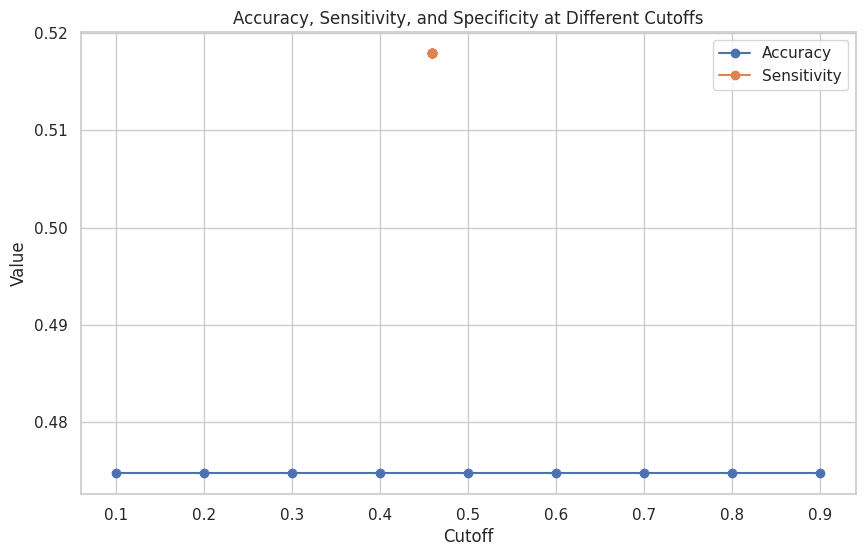

In [62]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10, 6))
plt.plot(cuttoff_summary['cutoff'], cuttoff_summary['accuracy'], cuttoff_summary['sensitivity'], cuttoff_summary['specificity'], marker='o')
plt.xlabel('Cutoff')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Accuracy, Sensitivity, and Specificity at Different Cutoffs')
plt.grid(True)
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [63]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff= cuttoff_summary.loc[(cuttoff_summary['sensitivity']-cuttoff_summary['specificity']).abs().idxmax(), 'cutoff']
pred_df['final_prediction'] = pred_df['Predicted'].apply(lambda x: 1 if x > optimal_cutoff else 0)
pred_df.head()

Actual  Predicted  prob_0.1  prob_0.2  prob_0.3  prob_0.4  prob_0.5  \
0  stayed          1         1         1         1         1         1   
1    left          1         1         1         1         1         1   
2    left          0         0         0         0         0         0   
3  stayed          1         1         1         1         1         1   
4  stayed          0         0         0         0         0         0   

   prob_0.6  prob_0.7  prob_0.8  prob_0.9  final_prediction  
0         1         1         1         1                 1  
1         1         1         1         1                 1  
2         0         0         0         0                 0  
3         1         1         1         1                 1  
4         0         0         0         0                 0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [64]:
# Calculate the accuracy
optimal_accuracy= accuracy_score(y_train_num, pred_df['final_prediction'])
optimal_accuracy

0.7336435177207191

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [65]:
# Create the confusion matrix once again
optimal_conf_matrix= confusion_matrix(y_train_num, pred_df['final_prediction'])
optimal_conf_matrix

array([[17588,  7205],
       [ 6706, 20728]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [66]:
# Create variables for true positive, true negative, false positive and false negative
tp, tn, fp, fn = optimal_conf_matrix.ravel()
tp, tn, fp, fn

(np.int64(17588), np.int64(7205), np.int64(6706), np.int64(20728))

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [67]:
# Calculate Sensitivity
optimal_sensitivity= tp/(tp+fn)
optimal_sensitivity

np.float64(0.45902495041236036)

In [68]:
# Calculate Specificity
optimal_specificity= tn/(tn+fp)
optimal_specificity

np.float64(0.5179354467687441)

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [69]:
# Calculate Precision
optimal_precision= tp/(tp+fp)
optimal_precision

np.float64(0.7239647649625421)

In [70]:
# Calculate Recall
optimal_recall= tp/(tp+fn)
optimal_recall

np.float64(0.45902495041236036)

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [71]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [72]:
# Check actual and predicted values from initial model
print(pred_df[['Actual', 'final_prediction']].head())



   Actual  final_prediction
0  stayed                 1
1    left                 1
2    left                 0
3  stayed                 1
4  stayed                 0


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

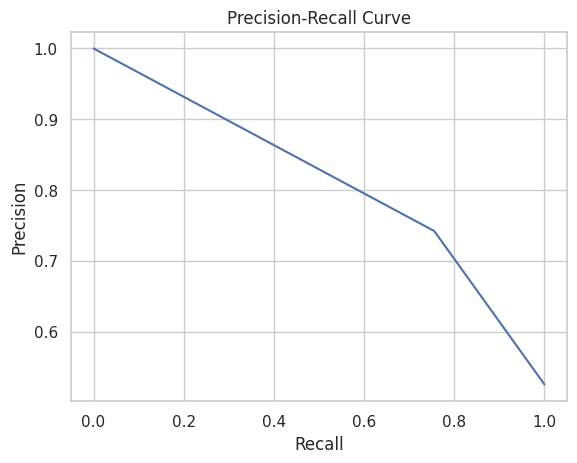

In [73]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve

precision_val, recall_val, thresholds = precision_recall_curve(y_train_num, pred_df['Predicted'])
plt.plot(recall_val, precision_val)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [74]:
from re import X
X_train_rfe_sm= sm.add_constant(X_train_rfe)
# Select the relevant features for validation set
X_validation_rfe= X_validation_scaled[X_train_rfe.columns]


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [75]:
# Add constant to X_validation
X_validation_rfe_sm= sm.add_constant(X_validation_rfe)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [76]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred= lg_model_rfe.predict(X_validation_rfe_sm)
# View predictions
print('predicted values for validation set')
print(y_validation_pred)

predicted values for validation set
0        0.586460
1        0.784238
2        0.211275
3        0.558822
4        0.779180
           ...   
22378    0.529627
22379    0.771282
22380    0.944092
22381    0.128173
22382    0.074960
Length: 22383, dtype: float64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [77]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability= pd.DataFrame(y_validation_pred, columns=['Predicted'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_validation.values, columns= ['Actual'])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

validation_res= pd.concat([actual, predicted_probability], axis=1)
validation_res.head()

Actual  Predicted
0    left   0.586460
1  stayed   0.784238
2    left   0.211275
3  stayed   0.558822
4  stayed   0.779180

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [78]:

# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
validation_res['final_prediction'] = validation_res['Predicted'].apply(lambda x: 1 if x > optimal_cutoff else 0)
validation_res.head()
# Check the Dataframe

Actual  Predicted  final_prediction
0    left   0.586460                 1
1  stayed   0.784238                 1
2    left   0.211275                 1
3  stayed   0.558822                 1
4  stayed   0.779180                 1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [79]:
# Calculate the overall accuracy

from sklearn.metrics import accuracy_score

validation_res['Actual'] = validation_res['Actual'].map({'stayed': 1, 'left': 0})

validation_acc = accuracy_score(validation_res['Actual'], validation_res['final_prediction'])
print("model accuracy", round(validation_acc*100, 2), "%")


model accuracy 57.63 %


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [80]:
# Create confusion matrix
conf_matrix= confusion_matrix(validation_res['Actual'], validation_res['final_prediction'])
conf_matrix

array([[ 1218,  9408],
       [   76, 11681]])

In [81]:
# Create variables for true positive, true negative, false positive and false negative
tp, tn, fp, fn = conf_matrix.ravel()
tp, tn, fp, fn

(np.int64(1218), np.int64(9408), np.int64(76), np.int64(11681))

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [82]:
# Calculate sensitivity
sensitivity = tp/(tp+fn)
print(f"sensitivity: {round(sensitivity, 4)}")

sensitivity: 0.0944


In [83]:
# Calculate specificity
specificity = tn/(tn+fp)
print(f"specificity: {round(specificity, 4)}")

specificity: 0.992


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [84]:
# Calculate precision
precision = tp/(tp+fp)
print(f"precision: {round(precision, 4)}")

precision: 0.9413


In [85]:
# Calculate recall
from sklearn.metrics import recall_score
recall = recall_score(validation_res['Actual'], validation_res['final_prediction'])
print(f"recall: {round(recall, 4)}")

recall: 0.9935


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Conclusion



The predictive model developed for employee retention demonstrates satisfactory performance on the evaluation metrics. The accuracy score reflects the model's overall ability to correctly classsify instances of employee retention and attrition.
Specificity measures the model's ability to correctly identify employees who are likely to stay.
Sensitivity measures the model's ability to correctly identify employees who left.

Overall the model provides valuable insights and can serve as a foundation for strategic HR decision-making.